# Lista 3 - Processamento de Imagens - UFOP

## Lucas Moreira 20.1.4972

In [7]:
img = imread ("lennaCompress.png");
# Instala package para compatibilidade com o Octave
pkg install -forge image
pkg load image


For information about changes from previous versions of the image package, run 'news image'.


### 1. Calcule o histograma da seguinte imagem:
#### a) Use a função imadjust()

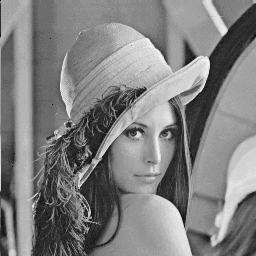

In [8]:
[lin,col,~] = size(img);
myimg = zeros(lin,col);
myimg = imadjust(img,[0.3 0.7],[0.4 0.7]);
myimg = uint8(myimg);
imshow(myimg);

#### b) Função contrast-stretching

In [9]:
function myimg = contrast_stretching(img, m, e)
    [lin,col,~] = size(img);
    myimg = zeros(lin, col);
    img = double(img);
    for i = 1:lin
        for j = 1:col
            r = img(i,j);
            myimg(i,j) = 1/(1+(m/r)^e);
        end
    end
    nimgAux = double(myimg);
    mmin = min(nimgAux(:));
    nimgAux = nimgAux - mmin;
    mmax = max(nimgAux(:));
    nimgAux = (255 * nimgAux) / mmax;
    myimg = uint8(nimgAux);
endfunction

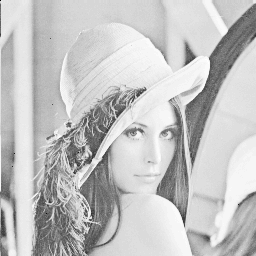

In [15]:
imshow(contrast_stretching(img, 30, 5))

#### c) Transformação power-low

In [11]:
function myimg = power_law(img, c, lambda)
    [lin,col,~] = size(img);
    myimg = zeros(lin, col);
    img = double(img);
    for i = 1:lin
        for j = 1:col
            r = img(i,j);
            myimg(i,j) = c * (r^lambda);
        end
    end
    nimgAux = double(myimg);
    mmin = min(nimgAux(:));
    nimgAux = nimgAux - mmin;
    mmax = max(nimgAux(:));
    nimgAux = (255 * nimgAux) / mmax;
    myimg = uint8(nimgAux);
endfunction

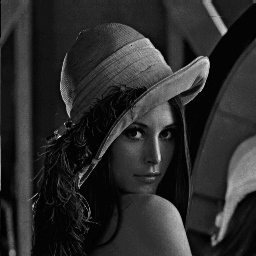

In [16]:
imshow(power_law(img, 5, 10))

#### 2) Para efeitos de realce de bordas(“edge enhancement”). Implemente dito algoritmo.

In [13]:
function myimg = edge_enchancement(img)
    [x y] = size(img);
    myimg = zeros(x,y);
    for i=2:1:x-1
        for j=2:1:y-1
            myimg(i+1,j+1) = img(i,j);
        endfor
    endfor
    myimg = abs(img - myimg);
endfunction

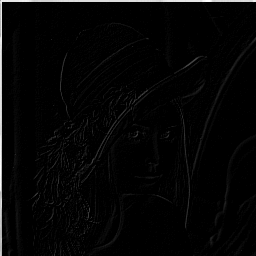

In [17]:
imshow(edge_enchancement(img))